In [ ]:
This project is to identify the attributes/characteristics that have high tendency of carring out fraudulent credit card transactions based on the dataset collected.

The hypothesis is that some of the demographic factors play an important clues to classify card users into differnt risk level of credit card default groupings.

Dataset Information:
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005
The target column is the 'default.payment.next.month'

There are 25 variables:
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [1750]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import json
from math import log
from sklearn.datasets import load_boston

%matplotlib inline

In [1751]:
Credit= pd.read_csv('/Users/kaiengwee/Documents/GitHub/GA18Aug/Project4/UCI_Credit_Card.csv')
Credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [1752]:
Credit.rename(columns={'default.payment.next.month':'default_nextMTH'},inplace= True)

In [1753]:
Credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [1754]:
Credit['default_nextMTH'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_nextMTH, dtype: float64

In [1755]:
Credit.shape

(30000, 25)

In [1756]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                 30000 non-null int64
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          30000 non-null float64
BILL_AMT2          30000 non-null float64
BILL_AMT3          30000 non-null float64
BILL_AMT4          30000 non-null float64
BILL_AMT5          30000 non-null float64
BILL_AMT6          30000 non-null float64
PAY_AMT1           30000 non-null float64
PAY_AMT2           30000 non-null float64
PAY_AMT3           30000 non-null float64
PAY_AMT4           30000 non-nu

In [1757]:
Credit.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [1758]:
Credit.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [1759]:
Credit.nunique()

ID                 30000
LIMIT_BAL             81
SEX                    2
EDUCATION              7
MARRIAGE               4
AGE                   56
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
default_nextMTH        2
dtype: int64

No default in next month: 23364
Default in next month: 6636
Proportion: 3.52 : 1


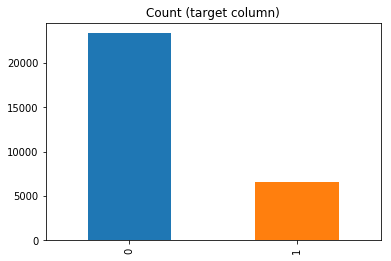

In [1760]:

target_count = Credit['default_nextMTH'].value_counts()
print('No default in next month:', target_count[0])
print('Default in next month:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target column)');


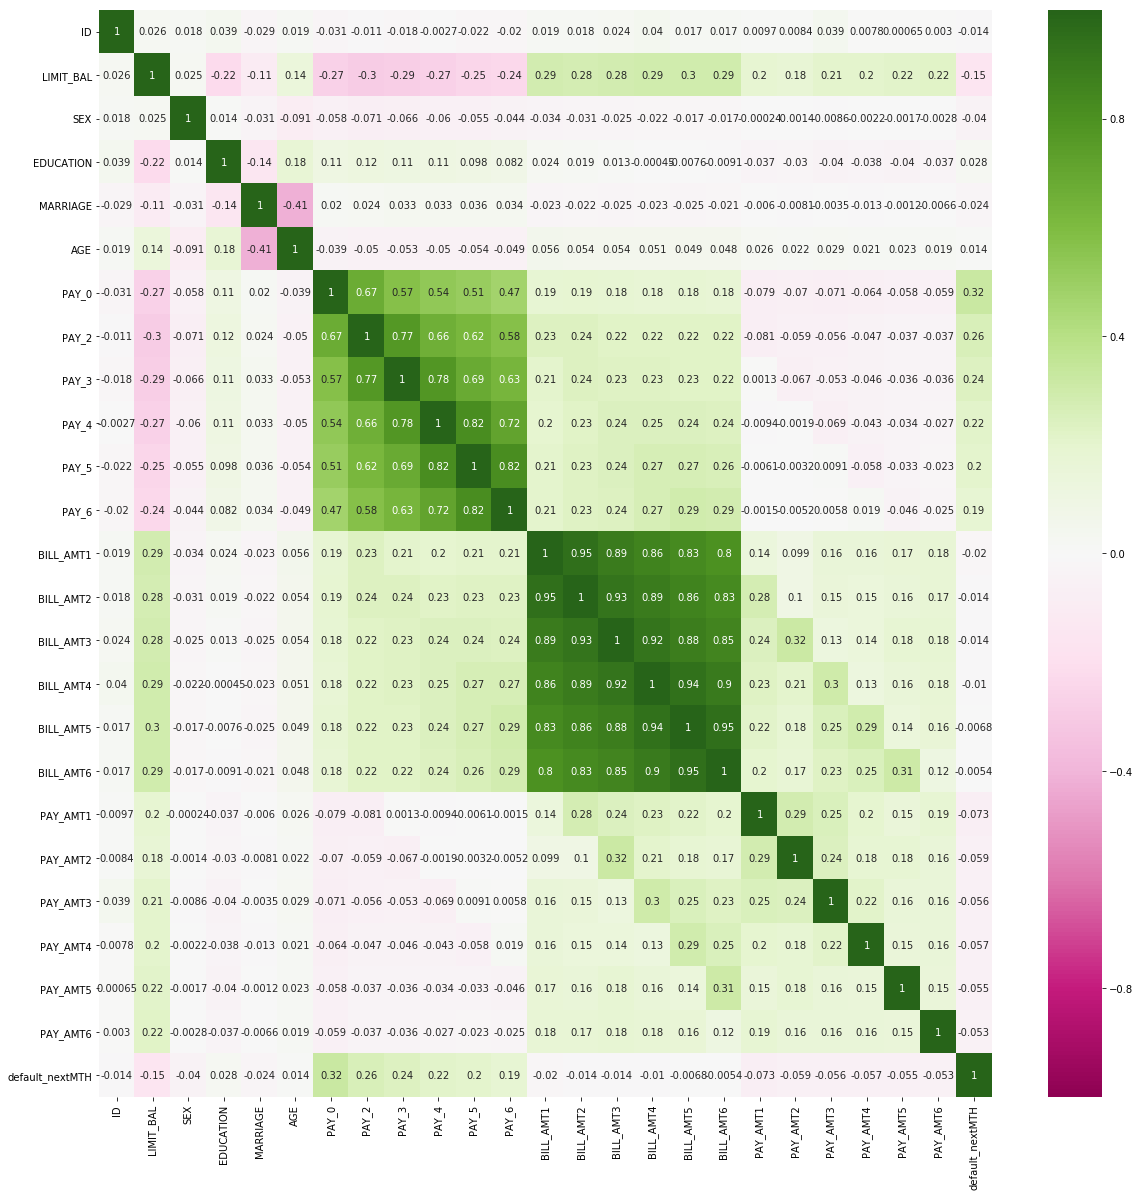

In [1761]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

From the heatmap above, BILL_AMT1 to BILL_AMT6 are highly correlated within themselves. Since BILL_AMT1 is the 
latest billing month before default occured, I will drop out BILL_AMT2 to BILL_AMT6. In addition, ID feature will 
also be removed since it doesn't mean anything in predicting the default occurence.

In [1762]:
Credit.drop(['ID','AGE','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1, inplace = True)

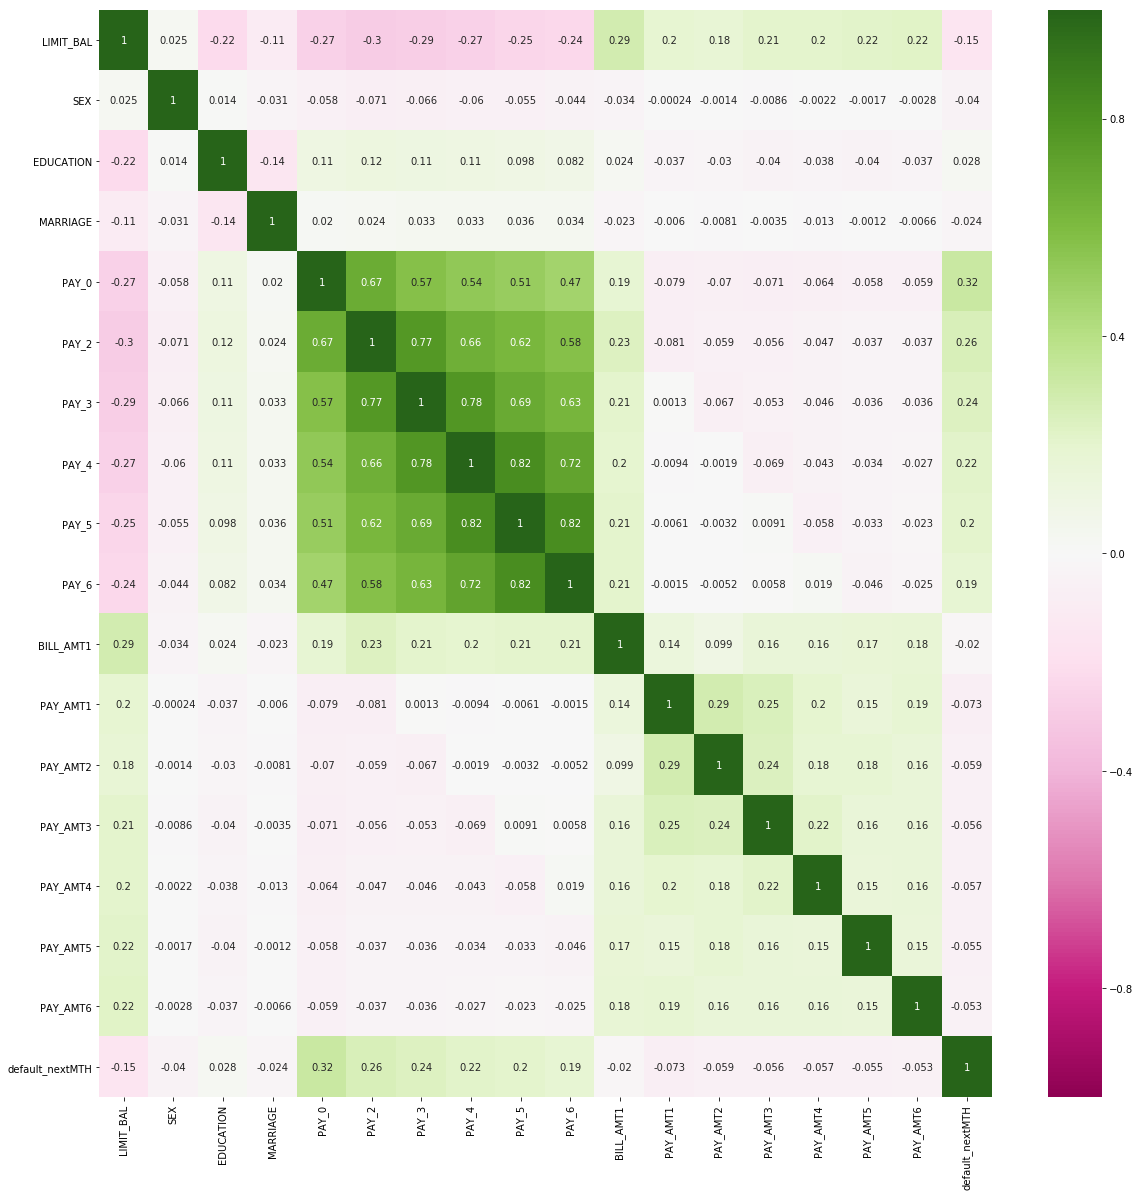

In [1763]:
plt.subplots(figsize=(20,20))
sns.heatmap(Credit.corr(),  annot=True, vmin=-1, vmax= 1, cmap='PiYG', center= 0)

In [1764]:
#sns.pairplot(Credit, size=4)

In [1765]:
count_d = 0
count_nd = 0

for i in Credit['default_nextMTH']:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 30000
Total default cases 6636 or  22.0 %
Total non-default cases 23364 or  78.0 %


In [1766]:
Credit.shape

(30000, 18)

In [1767]:
Credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_nextMTH
0,20000.0,2,2,1,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,-1,0,-1,0,0,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [1770]:
Credit.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default_nextMTH    0
dtype: int64

In [1771]:
Credit['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [1772]:
EDUCATION_dummies= pd.get_dummies(Credit.EDUCATION, prefix= 'EDUCATION')
EDUCATION_dummies.sample(n=5, random_state=1)

,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
10747,0,0,0,1,0,0,0
12573,0,0,0,1,0,0,0
29676,0,0,1,0,0,0,0
8856,0,0,0,1,0,0,0
21098,0,1,0,0,0,0,0


In [1773]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# Drop EDUCATION_0 & EDUCATION_6, columns with unknown
EDUCATION_dummies.drop(EDUCATION_dummies.columns[0], axis=1, inplace= True)
EDUCATION_dummies.drop(EDUCATION_dummies.columns[-1], axis=1, inplace= True)
EDUCATION_dummies.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [1774]:
Credit['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [1779]:
MARRIAGE_dummies= pd.get_dummies(Credit.MARRIAGE, prefix= 'MARRIAGE')
MARRIAGE_dummies.sample(n=5, random_state=1)

,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
10747,0,1,0,0
12573,0,1,0,0
29676,0,1,0,0
8856,0,1,0,0
21098,0,0,1,0


In [1780]:
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
MARRIAGE_dummies.drop(MARRIAGE_dummies.columns[0], axis=1, inplace= True)
MARRIAGE_dummies.head()

,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [1781]:
Credit_dummies= pd.concat([Credit, EDUCATION_dummies, MARRIAGE_dummies], axis=1)
Credit_dummies.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,default_nextMTH,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,2,1,2,2,-1,-1,-2,-2,...,0.0,1,0,1,0,0,0,1,0,0
1,120000.0,2,2,2,-1,2,0,0,0,2,...,2000.0,1,0,1,0,0,0,0,1,0
2,90000.0,2,2,2,0,0,0,0,0,0,...,5000.0,0,0,1,0,0,0,0,1,0
3,50000.0,2,2,1,0,0,0,0,0,0,...,1000.0,0,0,1,0,0,0,1,0,0
4,50000.0,1,2,1,-1,0,-1,0,0,0,...,679.0,0,0,1,0,0,0,1,0,0


In [1904]:
Credit_dummies.drop(['EDUCATION','MARRIAGE'], axis = 1, inplace = True)

In [1905]:
y= Credit_dummies.default_nextMTH
Credit_dummies.drop(['default_nextMTH'], axis=1, inplace= True)
Credit_dummies= pd.concat([Credit_dummies, y], axis=1)

In [1909]:
Credit_dummies.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'default_nextMTH'],
      dtype='object')

In [1910]:
Credit_dummies.shape

(30000, 24)

In [1911]:
# Create feature matrix (X)
feature_cols= Credit_dummies.columns.drop(['default_nextMTH'])
X= Credit_dummies[feature_cols]

# Create response vector (y)

y= Credit_dummies.default_nextMTH

In [1912]:
print((type(X)))
print((type(X.values)))
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [1913]:
print((X.shape))
print((y.shape))

(30000, 23)
(30000,)


In [1914]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

Split data set for Train and Test sets using Logistic Regression and check their accuracies

In [1915]:
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)

print('Testing score: '  + str(linreg.score(X_test, y_test)))
print('Training score: '  + str(linreg.score(X_train, y_train)))

Testing score: 0.7830666666666667
Training score: 0.7773777777777777


In [1918]:
print(linreg.intercept_)
print(linreg.coef_)

[-3.47164363e-06]


[('LIMIT_BAL',
  array([-5.17794797e-06, -6.07068689e-06,  7.90994864e-06,  6.44388212e-06,
          6.03254879e-06,  5.75950086e-06,  5.73165090e-06,  5.66282211e-06,
          1.12161196e-06, -2.67300650e-05, -2.39694748e-05, -1.30206599e-05,
         -9.23858799e-06, -4.11949386e-06, -4.06964306e-06, -6.90534742e-07,
         -1.89355508e-06, -6.85007744e-07, -3.95481187e-08, -1.38080497e-07,
         -6.77707550e-07, -2.70093397e-06, -6.94146832e-08]))]

In [1919]:
coeff = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=[0])
coeff

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,PAY_AMT5,PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-0.000005,-0.000006,0.000008,0.000006,0.000006,0.000006,0.000006,0.000006,0.000001,-0.000027,...,-0.000004,-0.000004,-6.905347e-07,-0.000002,-6.850077e-07,-3.954812e-08,-1.380805e-07,-6.777076e-07,-0.000003,-6.941468e-08


Check the Root Mean Square Error of Train and Test sets

In [1920]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.default_nextMTH
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [1921]:
Credit_dummies.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'default_nextMTH'],
      dtype='object')

In [1923]:
print(train_test_rmse(Credit_dummies,['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']))

0.38534348400174967


In [1924]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

array([0.21693333, 0.21693333, 0.21693333, ..., 0.21693333, 0.21693333,
       0.21693333])

In [1925]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.4121568417753395

Apply Smote Tomek on imbalanced dataset

Automatically created module for IPython interactive environment


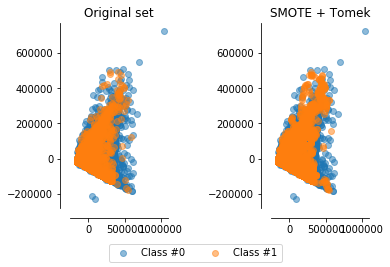

In [1954]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

X= Credit_dummies[feature_cols]
y= Credit_dummies.default_nextMTH

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.22, 0.78],
                           #n_informative=3, n_redundant=1, flip_y=0,
                           #n_features=18, n_clusters_per_class=1,
                           #n_samples=30000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components= 2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply SMOTE + Tomek links
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.set_xlim([-6, 8])
    #ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()



In [1955]:
# To check the level of imbalanced data set after Smote Tomek application:

count_d = 0
count_nd = 0

for i in y_resampled:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 45206
Total default cases 22603 or  50.0 %
Total non-default cases 22603 or  50.0 %


In [1956]:
X= pd.DataFrame(X_resampled)
y= pd.DataFrame(y_resampled)
Credit_ST= pd.concat([X, y], axis= 1)
Credit_ST.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,0
0,20000.0,2.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,120000.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,0.0,...,2000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,90000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,...,5000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,50000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,...,1000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,50000.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,2000.0,...,679.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [1957]:
Credit_ST.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,0
0,20000.0,2.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,120000.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,0.0,...,2000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,90000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,...,5000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,50000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,...,1000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,50000.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,2000.0,...,679.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [1958]:
Credit_dummies.head(1)

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default_nextMTH
0,20000.0,2,2,2,-1,-1,-2,-2,3913.0,0.0,...,0.0,0,1,0,0,0,1,0,0,1


In [1959]:
# Put headers of Credit_dummies.columns onto X_resampled and y_resampled

initialcol = Credit_dummies.columns
Credit_ST.columns = initialcol

In [1960]:
feature_cols= Credit_ST.columns.drop(['default_nextMTH'])
X= Credit_ST[feature_cols]

# Create response vector (y)

y= Credit_ST.default_nextMTH

In [1961]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pred = scaler.fit_transform(X)

Split data set which has been treated by Smote Tomek, for Train and Test sets using Logistic Regression and check their accuracies

In [1962]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train)))

Testing score: 0.5253937356220139
Training score: 0.5248643227937706


Check the test data set accuracy using confusion matric

In [1945]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [1946]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,4596,1058
Actual: Yes,4259,1401


In [1947]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.81      0.63      5654
          1       0.57      0.25      0.35      5660

avg / total       0.54      0.53      0.49     11314



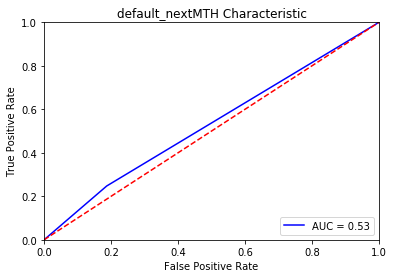

In [1948]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1963]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.25, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

In [1964]:
1- y_train.mean()

0.5011208117036339

In [1965]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.5193771013979827


In [1966]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [1967]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[4576, 1037],
       [4395, 1294]])

Using another Smote Tomek method

In [1968]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X, y)

In [1969]:
count_d = 0
count_nd = 0

for i in y_sm:
    if i == 1:
        count_d += 1
    else:
        count_nd += 1
    
total= count_d + count_nd
print("Total cases under study", total)
print("Total default cases", count_d,"or ", round(count_d/total,2)*100,"%" )
print("Total non-default cases", count_nd,"or ", round(count_nd/total,2)*100,"%" )

Total cases under study 45206
Total default cases 22603 or  50.0 %
Total non-default cases 22603 or  50.0 %


In [1977]:
from sklearn.linear_model import LogisticRegression
linreg = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print('Testing score: '  + str(logreg.score(X_test, y_test)))
print('Training score: '  + str(logreg.score(X_train, y_train)))

Testing score: 0.5253937356220139
Training score: 0.5248643227937706


In [ ]:
Apply RandomForest to get model accuracy

In [1981]:
from sklearn.ensemble import RandomForestClassifier

# Train model
Random = RandomForestClassifier()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model= Random.fit(X_train,y_train)
 
# Predict on training set
y_pred = Random.predict(X_test)
 
print('Testing score: '  + str(Random.score(X_test, y_test)))
print('Training score: '  + str(Random.score(X_train, y_train)))
    
# Is our model still predicting just one class?
#print(np.unique( y_pred ) )

 
# How's our accuracy?
#print( 'accuracy score',+ accuracy_score(y, y_pred) )

Testing score: 0.875243319766413
Training score: 0.9852229825389335


Check the test data set accuracy using confusion matric

In [1982]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cm=metrics.confusion_matrix(y_test,y_pred)

In [1983]:
list1 = ["Actual: No", "Actual: Yes"]
list2 = ["Predicted: No", "Predicted: Yes"]
pd.DataFrame(cm, list1,list2)

,Predicted: No,Predicted: Yes
Actual: No,5206,425
Actual: Yes,985,4686


In [1984]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88      5631
          1       0.92      0.83      0.87      5671

avg / total       0.88      0.88      0.87     11302



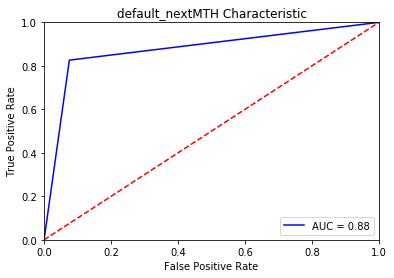

In [1985]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('default_nextMTH Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1971]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge

# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4554970521824792


In [1972]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

[('LIMIT_BAL', -1.3968468737807175e-07),
 ('SEX', -0.03689130103285027),
 ('PAY_0', 0.127624660374613),
 ('PAY_2', 0.016951797261007838),
 ('PAY_3', 0.012271731254802982),
 ('PAY_4', 0.0010584124467634141),
 ('PAY_5', 0.0036563380071872468),
 ('PAY_6', -0.0034648861316639613),
 ('BILL_AMT1', -4.48286820262525e-07),
 ('PAY_AMT1', -1.2644691530851983e-06),
 ('PAY_AMT2', -5.670921377328072e-07),
 ('PAY_AMT3', -1.1309047990400207e-07),
 ('PAY_AMT4', -9.38755767898521e-07),
 ('PAY_AMT5', -8.144472531168752e-07),
 ('PAY_AMT6', -6.879048613621247e-07),
 ('EDUCATION_1', 0.08893088269828565),
 ('EDUCATION_2', 0.07617229699128063),
 ('EDUCATION_3', 0.08241103714476034),
 ('EDUCATION_4', -0.15369886884865536),
 ('EDUCATION_5', -0.19078903651672227),
 ('MARRIAGE_1', 0.22185380888290915),
 ('MARRIAGE_2', 0.17506733713143832),
 ('MARRIAGE_3', 0.2175330968184507)]

In [1973]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4561152817945325


In [1974]:
# Examine the coefficients.
list(zip(feature_cols, ridgereg.coef_))

[('LIMIT_BAL', -1.5078597769919135e-07),
 ('SEX', -0.034009100015276586),
 ('PAY_0', 0.10873765147836427),
 ('PAY_2', 0.022088492041206588),
 ('PAY_3', 0.01234876049438856),
 ('PAY_4', 0.00401931010361046),
 ('PAY_5', 0.003826718915621508),
 ('PAY_6', -0.0008251822128663166),
 ('BILL_AMT1', -3.815280164812591e-07),
 ('PAY_AMT1', -1.2479274958420205e-06),
 ('PAY_AMT2', -5.647689565141364e-07),
 ('PAY_AMT3', -1.9175956290244978e-07),
 ('PAY_AMT4', -9.375217505725729e-07),
 ('PAY_AMT5', -8.176459484416909e-07),
 ('PAY_AMT6', -7.067568654888172e-07),
 ('EDUCATION_1', 0.011911077777733044),
 ('EDUCATION_2', 0.0015078185920639792),
 ('EDUCATION_3', 0.00675628374490702),
 ('EDUCATION_4', -0.21104840467873698),
 ('EDUCATION_5', -0.24506591908651046),
 ('MARRIAGE_1', 0.027313940795551887),
 ('MARRIAGE_2', -0.017019075366617255),
 ('MARRIAGE_3', 0.0226930435380994)]

[0 1]
accuracy score 0.9857319824802018
